#Code


In [ ]:
# download dataset
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [ ]:
# unzip the dataset
!unzip kagglecatsanddogs_5340.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from keras.utils import load_img
import os
import tqdm
import random
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [ ]:
# dataframe
input_path = []
label = []

for image_class in os.listdir("PetImages"):
  for path in os.listdir("PetImages/" + image_class):
    if image_class == 'Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages", image_class, path))

In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop = True)
df['label'] = df['label'].astype('str')

In [ ]:
# delete db files

df = df[df['images'] != 'PetImages/Dog/Thumbs.db']
df = df[df['images'] != 'PetImages/Cat/Thumbs.db']
df = df[df['images'] != 'PetImages/Dog/11702.jpg']
df = df[df['images'] != 'PetImages/Cat/666.jpg']

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label'] == 1]['images']
start = random.randint(0, len(temp))
files = temp[start:start + 25]

for index, file in enumerate(files):
  plt.subplot(5, 5, index + 1)
  img = load_img(file)
  img = np.array(img)

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label'] == 0]['images']
start = random.randint(0, len(temp))
files = temp[start:start + 25]

for index, file in enumerate(files):
  plt.subplot(5, 5, index + 1)
  img = load_img(file)
  img = np.array(img)

In [ ]:
# input split
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

In [ ]:
# datagenerator
train_generator = ImageDataGenerator(
    # normalization of images
    rescale = 1./255,
    # augmentation of images
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest' 
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    df, x_col = 'images', 
    y_col = 'label',
    target_size = (128, 128),
    batch_size = 512,
    class_mode = 'binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, x_col = 'images', 
    y_col = 'label',
    target_size = (128, 128),
    batch_size = 512,
    class_mode = 'binary'
)

Found 24998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
# model creation

model = Sequential([
    Conv2D(16, (3, 3), activation = 'relu', input_shape = (128, 128, 3)),
    MaxPool2D((2, 2)),
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam', 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
history = model.fit(train_iterator, epochs = 10, validation_data = val_iterator)

Epoch 1/10
49/49 [==============================] - 167s 3s/step - loss: 0.8129 - accuracy: 0.5362 - val_loss: 0.6689 - val_accuracy: 0.5582
Epoch 2/10
49/49 [==============================] - 158s 3s/step - loss: 0.6331 - accuracy: 0.6391 - val_loss: 0.5956 - val_accuracy: 0.6728
Epoch 3/10
49/49 [==============================] - 154s 3s/step - loss: 0.5753 - accuracy: 0.6971 - val_loss: 0.5223 - val_accuracy: 0.7408
Epoch 4/10
49/49 [==============================] - 152s 3s/step - loss: 0.5444 - accuracy: 0.7218 - val_loss: 0.5019 - val_accuracy: 0.7564
Epoch 5/10
49/49 [==============================] - 153s 3s/step - loss: 0.5217 - accuracy: 0.7390 - val_loss: 0.5017 - val_accuracy: 0.7526
Epoch 6/10
49/49 [==============================] - 153s 3s/step - loss: 0.5042 - accuracy: 0.7515 - val_loss: 0.4797 - val_accuracy: 0.7614
Epoch 7/10
49/49 [==============================] - 151s 3s/step - loss: 0.4966 - accuracy: 0.7559 - val_loss: 0.4723 - val_accuracy: 0.7702
Epoch 8/10
49

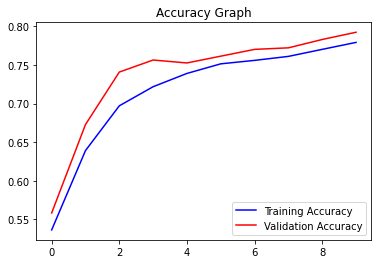

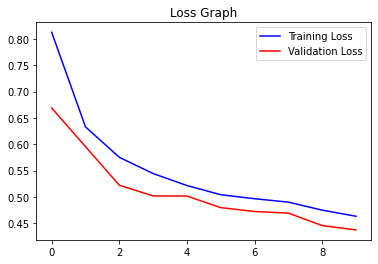

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(acc))

plt.plot(epoch, acc, 'b', label = 'Training Accuracy')
plt.plot(epoch, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epoch, loss, 'b', label = 'Training Loss')
plt.plot(epoch, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
model_save_path = '/content/gdrive/My Drive/'
model_name = 'dogs_vs_cats.h5'
save_full_path = model_save_path+model_name
print(save_full_path)
model.save(save_full_path, save_format='h5')

Mounted at /content/gdrive
/content/gdrive/My Drive/dogs_vs_cats.h5


In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('Cat_November_2010-1a.jpg')

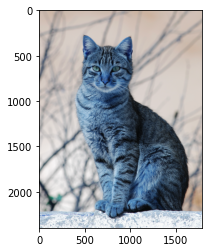

In [ ]:
plt.imshow(test_img)